The goal of this project was to use basic ML methods to determine the best indicators of Heart disease. We will be using the Kaggle Heart Disease dataset, located: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

For our ML models, we will explore:
- Logistic Regressoin
- Support Vector Machines
- Random Forest Classifiers

##Imports

In [ ]:
import pandas as pd
import numpy as np

##Data Exploration

In [ ]:
#Loading Data
heart_df = pd.read_csv('heart_2020_cleaned.csv')

Brief Look at the Data 

In [ ]:
print(heart_df.describe(include = 'all'))

       HeartDisease            BMI Smoking AlcoholDrinking  Stroke  \
count        319795  319795.000000  319795          319795  319795   
unique            2            NaN       2               2       2   
top              No            NaN      No              No      No   
freq         292422            NaN  187887          298018  307726   
mean            NaN      28.325399     NaN             NaN     NaN   
std             NaN       6.356100     NaN             NaN     NaN   
min             NaN      12.020000     NaN             NaN     NaN   
25%             NaN      24.030000     NaN             NaN     NaN   
50%             NaN      27.340000     NaN             NaN     NaN   
75%             NaN      31.420000     NaN             NaN     NaN   
max             NaN      94.850000     NaN             NaN     NaN   

        PhysicalHealth   MentalHealth DiffWalking     Sex AgeCategory    Race  \
count     319795.00000  319795.000000      319795  319795      319795  319795 

##Data Visualization

In [ ]:
#Histogram Visualization

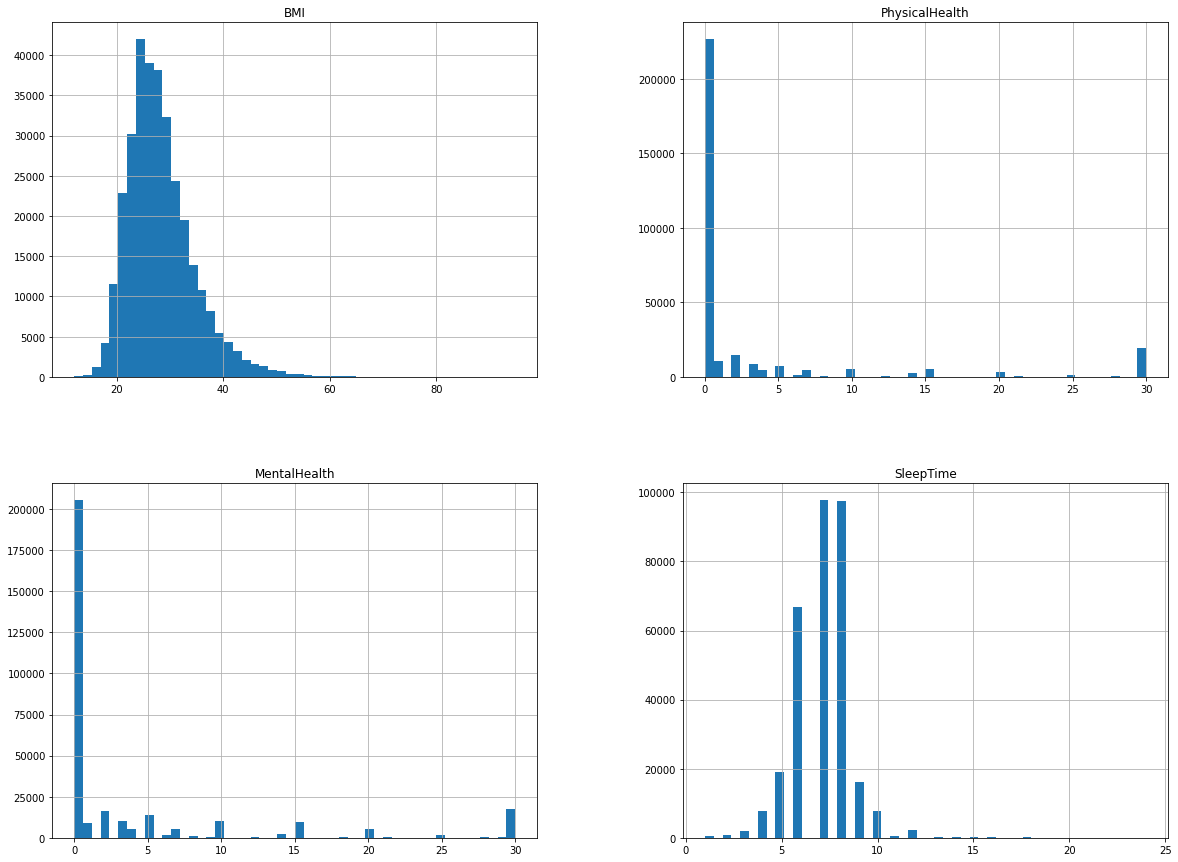

In [ ]:
import matplotlib.pyplot as plt
heart_df.hist(bins = 50, figsize = (20,15))
plt.show()

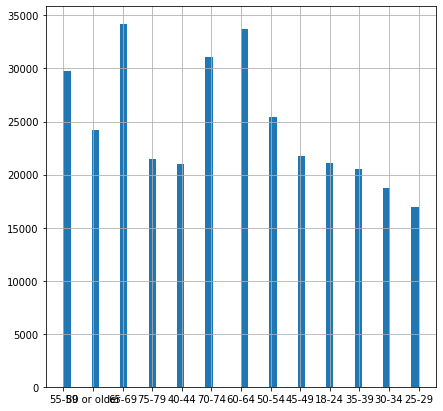

In [ ]:
#More visualizations 
heart_df['AgeCategory'].hist(bins = 50, figsize = (7,7))
plt.show()

~somewhat uniform age distribution, with peaks at 60-64 and 65-69 

BMI & Sleeptime follow normal distributions; MentalHealth and PHysical Health follow ~Long tail distributions, with the vast majority of people reporting 0 bad health days in the past 30 days. 

In [ ]:
heart_df['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

~27k people have been diagnosed with heart disease; ~292k have **not** been diagnosed with Heart Disease. 

Now, let's break data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(heart_df, test_size = .2, random_state = 40) #Random sampling method should be sufficient given the quantity of data

Visualize the data to generate more insights 

In [ ]:
#let's generate cross tabs and plots 
import seaborn as sns


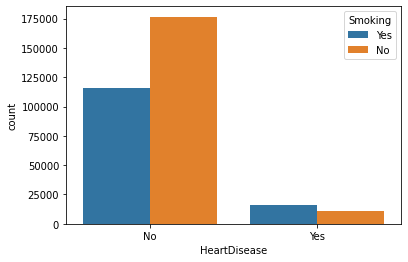

In [ ]:
sns.countplot(x = 'HeartDisease', hue = 'Smoking', data = heart_df)

As we can see, smoking is likely a large risk factor. Let's do this with a few other features: 


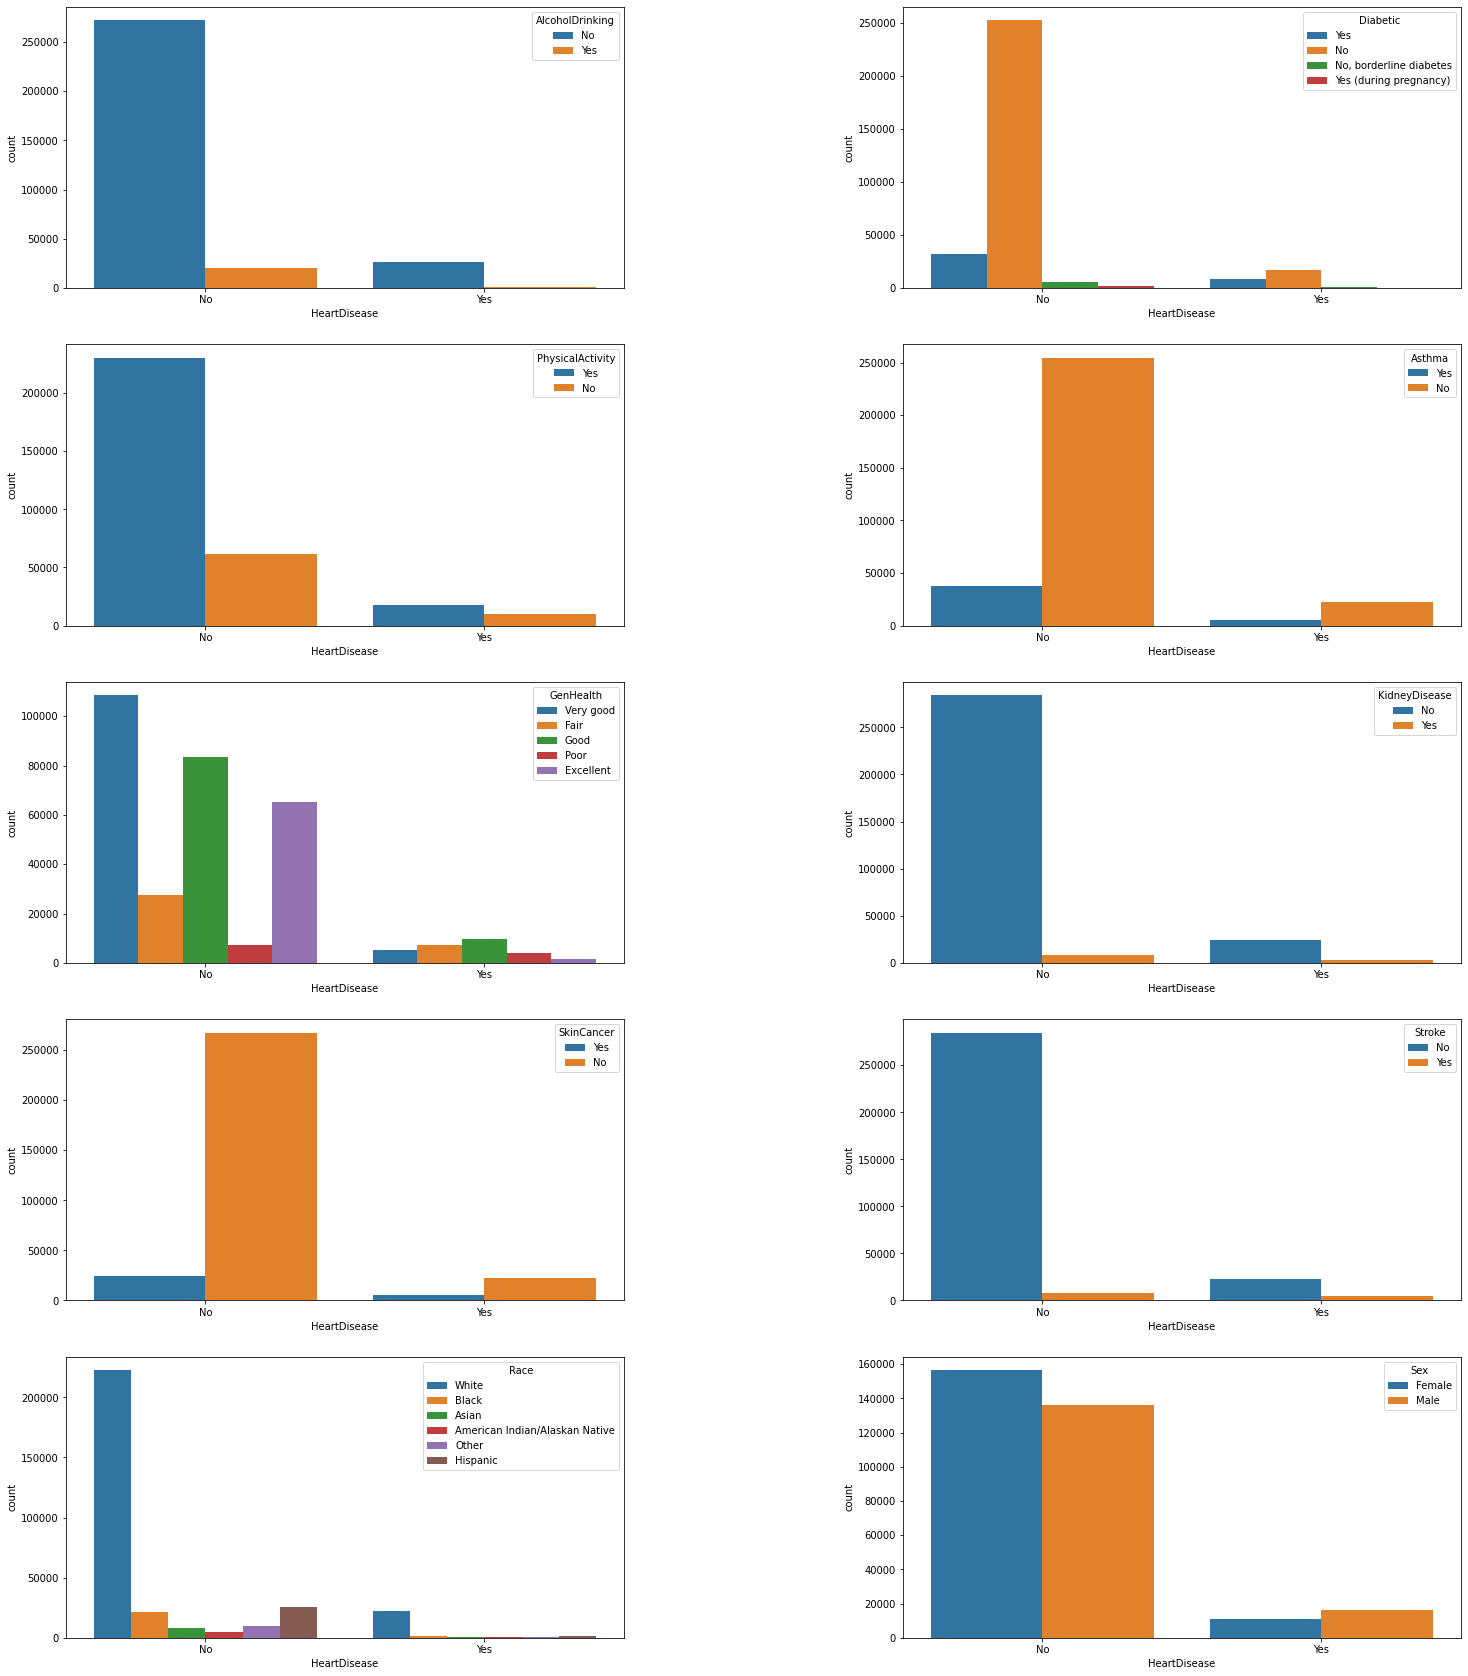

In [ ]:
fig, ax =plt.subplots(5,2, figsize=(25,30))


sns.countplot(x = 'HeartDisease', hue = 'AlcoholDrinking', data = heart_df, ax = ax[0,0])
sns.countplot(x = 'HeartDisease', hue = 'Diabetic', data = heart_df, ax = ax[0,1])
sns.countplot(x = 'HeartDisease', hue = 'PhysicalActivity', data = heart_df, ax = ax[1,0])
sns.countplot(x = 'HeartDisease', hue = 'Asthma', data = heart_df, ax = ax[1,1])
sns.countplot(x = 'HeartDisease', hue = 'GenHealth', data = heart_df, ax = ax[2,0])
sns.countplot(x = 'HeartDisease', hue = 'KidneyDisease', data = heart_df, ax = ax[2,1])
sns.countplot(x = 'HeartDisease', hue = 'SkinCancer', data = heart_df, ax = ax[3,0])
sns.countplot(x = 'HeartDisease', hue = 'Stroke', data = heart_df, ax = ax[3,1])
sns.countplot(x = 'HeartDisease', hue = 'Race', data = heart_df, ax = ax[4,0])
sns.countplot(x = 'HeartDisease', hue = 'Sex', data = heart_df, ax = ax[4,1])

plt.subplots_adjust(wspace = .5)
plt.subplots_adjust(wspace = .5)

fig.show()

A few observations: 
- males are disproportionately likely to have HD
- (of course) general health is negatively correlated with HD
- Those with heart disease do less physical activity 

## Crosstabs
now that we've done some visualizations, let's see Heart Disease's crosstabs 


In [ ]:
#Crosstabs
print(pd.crosstab(heart_df['HeartDisease'], heart_df['Smoking'], normalize = True))
print("----------------------------")
print(pd.crosstab(heart_df['HeartDisease'], heart_df['AlcoholDrinking'], normalize = True))
print("----------------------------")
print(pd.crosstab(heart_df['HeartDisease'], heart_df['PhysicalActivity'], normalize = True))
print("----------------------------")
print(pd.crosstab(heart_df['HeartDisease'], heart_df['Asthma'], normalize = True))
print("----------------------------")
print(pd.crosstab(heart_df['HeartDisease'], heart_df['GenHealth'], normalize = True))
print("----------------------------")
print(pd.crosstab(heart_df['HeartDisease'], heart_df['Sex'], normalize = True))


Smoking             No       Yes
HeartDisease                    
No            0.552076  0.362329
Yes           0.035448  0.050148
----------------------------
AlcoholDrinking        No       Yes
HeartDisease                       
No               0.849876  0.064529
Yes              0.082028  0.003568
----------------------------
PhysicalActivity        No       Yes
HeartDisease                        
No                0.193730  0.720674
Yes               0.030907  0.054688
----------------------------
Asthma              No       Yes
HeartDisease                    
No            0.795769  0.118635
Yes           0.070170  0.015426
----------------------------
GenHealth     Excellent      Fair      Good      Poor  Very good
HeartDisease                                                    
No             0.204325  0.086283  0.261327  0.023262   0.339208
Yes            0.004691  0.022152  0.029888  0.012039   0.016826
----------------------------
Sex             Female      Male
HeartD

Let's do some Chi2 tests on HD and (physical activity, smoking, Sex): 

In [ ]:
#DO WE USE NORMALIZED Crosstabs for chi 2? 
from scipy.stats import chi2_contingency
#smoking
table = pd.crosstab(heart_df['HeartDisease'], heart_df['Smoking'], normalize = True)
chi2, pval, dof, expected = chi2_contingency(table)
print(pval)
#physical activity
table = pd.crosstab(heart_df['HeartDisease'], heart_df['PhysicalActivity'], normalize = True)
chi2, pval, dof, expected = chi2_contingency(table)
print(pval)

#sex
table = pd.crosstab(heart_df['HeartDisease'], heart_df['Sex'], normalize = True)
chi2, pval, dof, expected = chi2_contingency(table)
print(pval)


0.00042716064841310657
2.8855362130235945e-05
0.000450205420112766


Clearly all of these variables are highly related to Heart Disease. Now let's try building a few ML models to see if we can predict HD.

##Preparing the Data

- One Hot Encode
- Feature Scaling (min-max)
- Transformation pipelines 

In [ ]:
print(heart_df.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [ ]:
#Drop missing data


heart_df.dropna(subset = ['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'], inplace = True)

In [ ]:
print(heart_df.isna().value_counts())

HeartDisease  BMI    Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  DiffWalking  Sex    AgeCategory  Race   Diabetic  PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer
False         False  False    False            False   False           False         False        False  False        False  False     False             False      False      False   False          False         319795
dtype: int64


In [ ]:
print(heart_df['HeartDisease'])

0          No
1          No
2          No
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: HeartDisease, Length: 319795, dtype: object


In [ ]:
#one hot encode
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

#categorical data
categorical_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'Sex', 'AgeCategory','Race', 'DiffWalking', 'Diabetic', 'PhysicalActivity','GenHealth','Asthma', 'KidneyDisease', 'SkinCancer' ] 

#import pandas as pd
heart_df_cat = pd.get_dummies(heart_df, columns = categorical_cols)


In [ ]:
print(heart_df_cat)

In [ ]:
# make a copy of dataframe
from sklearn.preprocessing import StandardScaler
heart_df_cat_scaled = heart_df_cat.copy()

col_names = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
features = heart_df_cat_scaled[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

heart_df_cat_scaled[col_names] = features
print(heart_df_cat_scaled.head())

     


In [ ]:
#Break into feature and targets
features = heart_df_cat_scaled.drop(['HeartDisease'], axis = 1)
targets = heart_df_cat_scaled['HeartDisease']


In [ ]:
from sklearn.model_selection import train_test_split
training_data, validation_data, training_labels, validation_labels = train_test_split(features, targets, test_size = .2, random_state = 100)

     


In [ ]:
print(training_labels.value_counts())

## Machine Learning Methods


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(training_data, training_labels)


# accuracies = []
# for k in range(1,100):
#   classifier = KNeighborsClassifier(n_neighbors = k)
#   classifier.fit(training_data, training_labels)
#   accuracies.append(classifier.score(validation_data, validation_labels))
#   #k = 

# import matplotlib.pyplot as plt

# k_list = range(1,100)

# plt.plot(k_list, accuracies)
# plt.xlabel("K")
# plt.ylabel("Validation Accuracy")
# plt.title("Heart Disease Classifier Accuracy")
# plt.show()


In [ ]:

# #now the model is trained, let's evaluate it on the training set 
# from sklearn.metrics import mean_squared_error
# heart_disease_predictions = neigh.predict(training_data)
# hd_mse = mean_squared_error(training_labels, heart_disease_predictions)
# hd_rmse = np.sqrt(hd_mse)
# hd_rmse


Very high prediction cost for KNN for high dimensional data ... will try again with a reduced dataset, with features related to lifestyle

In [ ]:
heart_df_red = heart_df[['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking','PhysicalActivity', 'SleepTime']]

In [ ]:
print(heart_df_red.head())

     


In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

#categorical data
categorical_cols = ['Smoking', 'AlcoholDrinking', 'PhysicalActivity' ] 

#import pandas as pd
heart_df_red_cat = pd.get_dummies(heart_df_red, columns = categorical_cols)

In [ ]:
print(heart_df_red_cat.head())
     


In [ ]:

#scale numerical values 
from sklearn.preprocessing import StandardScaler
heart_df_red_cat_scaled = heart_df_red_cat.copy()

col_names = ['BMI', 'SleepTime']
features = heart_df_red_cat_scaled[col_names]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

heart_df_red_cat_scaled[col_names] = features
print(heart_df_red_cat_scaled.head())

In [ ]:
#recast into simpler name: 
heart_red_clean = heart_df_red_cat_scaled.copy()
     


In [ ]:
#recast into simpler name: 
heart_red_clean = heart_df_red_cat_scaled.copy()
     

X = heart_red_clean.drop(columns = ['HeartDisease'])
y = heart_red_clean['HeartDisease']
print(X)
print(y)
     


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
print(y_train)

Now we should be ready for KNN

###Redo KNN with reduced dataset dimensionality 

In [ ]:
#Remake our KNN model: 
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

In [ ]:
#Evaluate
print('Training set score: ' + str(classifier.score(X_train,y_train)))
print('Test set score: ' + str(classifier.score(X_test,y_test)))

90% accurate on the training set 89% accurate on the testing set


In [ ]:
#Save the KNN model 
import pickle
heart_knn_model = 'finalized_heart_knn_model.sav'
pickle.dump(classifier, open(heart_knn_model, 'wb'))
 
# load the model from disk
heart_knn_model = pickle.load(open(heart_knn_model, 'rb'))

### Logistic Regression 

Make model, and fit it

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


Make predictions with model on test set

In [ ]:
#Setting the threshold to .15 (low because we don't want false negatives)
# y_pred= model.predict(X_test)
y_pred = (model.predict_proba(X_test)[:,1] >= 0.15)

In [ ]:
print(y_pred[:200])
# print(y_test.value_counts())
     


In [ ]:
y_pred = y_pred.tolist()
     


In [ ]:
for i in range(len(y_pred)): 
  if y_pred[i] == False: 
    y_pred[i] = 0

  elif y_pred[i] == True: 
    y_pred[i] = 1

In [ ]:
y_test = y_test.tolist()
     


In [ ]:
for i in range(len(y_test)): 
  if y_test[i] == 'No': 
    y_test[i] = 0

  elif y_test[i] == 'Yes': 
    y_test[i] = 1


Evaluating the Logistic regression model

Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


Accuracy, Precision, Recall

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
# output: 84% 
 
# precision:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))
# output:  17&
 
# recall: 
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))
# output: 21% 
 
# F1 score
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))
# output:  18% 
     


Ouch.... pretty terrible precision, recall, and F1


### Support Vector Machine 


Create SVM model, train it, and make predictions

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
     


Evaluate predictions

In [ ]:
#Evaluating tnhe Model
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#Model Precision: 
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))
     


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 1)
forest.fit(X_train, y_train)
print(forest.feature_importances_)
     


In [ ]:
#convert y_test into 'No' 'Yes'
for i in range(len(y_test)): 
  if y_test[i] == 0: 
    y_test[i] = 'No'
  if y_test[i] == 1: 
    y_test[i] = 'Yes'

In [ ]:
print(forest.score(X_test, y_test))
     


It looks like the Random Forest Classifier had a mean accuracy of ~90% Since this is the base model with the largest accuracy, let's see if we can improve the score of RFC:


### Modifying our RFC model 

We will optimize some hypers by doing a gridsearch over the following : 

- n_estimators
- max_features 
- bootstrap
- n_estimators
- max_features




In [ ]:
print(X_train)
     


In [ ]:
y_train = y_train.tolist()
     


In [ ]:
#convert y_test 'No' 'Yes' into 0 and 1
for i in range(len(y_train)): 
  if y_train[i] == 'No': 
    y_train[i] = 0
  if y_train[i] == 'Yes': 
    y_train[i] = 1

In [ ]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
              {'bootstrap': [False],'n_estimators': [3,10], 'max_features':[2,3,4]},
              
              
              ]  

forest = RandomForestClassifier()

gridsearch = GridSearchCV(forest, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
    

gridsearch.fit(X_train, y_train)

In [ ]:
print(gridsearch.best_params_)
print(gridsearch.best_estimator_)
#evaluation scores 
cvres = gridsearch.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)
     


It looks like the best parameters are: max_features: 4; n_estimators = 10 !


In [ ]:
final_model= gridsearch.best_estimator_

Evaluate system on the Test set


In [ ]:
from sklearn.metrics import mean_squared_error
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
print(final_rmse)
     


We finish with a RMSE of 0.312 using a Random Forest Classifier with max_features = 4 and num_estimators = 10 